In [1]:
%matplotlib inline
from IPython.display import Image, display
import numpy as np
import tensorflow as tf
import vgg19
from loss import gram_matrix
from images import load_image, add_one_dim, image_big

In [2]:
model_file_path = "vgg19/vgg19.mat"
net = vgg19.VGG19(model_file_path)

In [3]:
content_filename = 'data/content/dolphins.jpg'
content_image = load_image(content_filename, max_size=512)
shape = [content_image.shape[1], content_image.shape[0]]
content_image = add_one_dim(content_image)
print(content_image.shape)

style_filename = 'data/styles/random-art.jpg'
style_image = load_image(style_filename, shape=shape)
style_image = add_one_dim(style_image)

(1, 288, 512, 3)


In [4]:
content_layers = ['conv4_2']
style_layers = ['relu1_1', 'relu2_1', 'relu3_1', 'relu4_1', 'relu5_1']

In [5]:
iterations = 20
content_layer_weights = [1.0]
style_layer_weights = [0.2, 0.2, 0.2, 0.2, 0.2]
clw = 5e0
slw = 1e4
tvlw = 1e-3

In [6]:
sess = tf.Session(config=tf.ConfigProto(allow_soft_placement=True))

In [ ]:
from style_transfer import StyleTransfer
import optimizers

st = StyleTransfer(
    sess,
    net,
    iterations,
    content_layers,
    style_layers,
    content_image,
    style_image,
    content_layer_weights,
    style_layer_weights,
    clw,
    slw,
    tvlw,
    optimizers.L_BFGS,
    plot=True,
    init_img_type="content"
)

Iteration: 0|loss 1166337695023104.0|0.0|116633772032.0|1971123.0


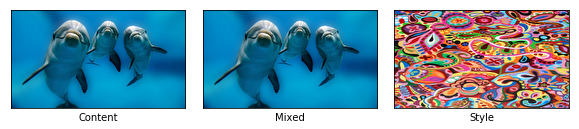

Iteration: 1|loss 1166219449204736.0|245.1664276123047|116621950976.0|1971358.25
Iteration: 2|loss 1165747673890816.0|6054.091796875|116574773248.0|1972489.375
Iteration: 3|loss 1163908891017216.0|100816.9375|116390895616.0|1976910.25
Iteration: 4|loss 1157681188438016.0|1240284.0|115768115200.0|1994556.25
Iteration: 5|loss 1140710430474240.0|20012912.0|114071035904.0|2109174.75
Iteration: 6|loss 1115845254184960.0|58082032.0|111584501760.0|2232628.0
Iteration: 7|loss 1034144775667712.0|226419296.0|103414366208.0|3036740.5
Iteration: 8|loss 872334030274560.0|609584128.0|87233101824.0|5053654.5
Iteration: 9|loss 864709859344384.0|2667937792.0|86469648384.0|12719621.0
Iteration: 10|loss 703433099182080.0|1303731968.0|70342656000.0|8072986.5


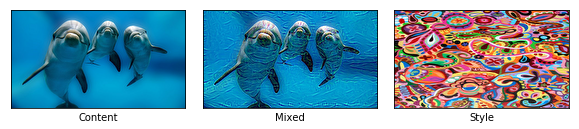

Iteration: 11|loss 670299573977088.0|2585182208.0|67028664320.0|12854576.0
Iteration: 12|loss 452187914240000.0|2089965312.0|45217746944.0|12064410.0
Iteration: 13|loss 345426301550592.0|2176532992.0|34541543424.0|12774368.0
Iteration: 14|loss 246014669750272.0|2462170624.0|24600236032.0|14297806.0
Iteration: 15|loss 166847819284480.0|2401536256.0|16683580416.0|14471810.0
Iteration: 16|loss 130899731546112.0|2813050624.0|13088566272.0|15769260.0
Iteration: 17|loss 114651400503296.0|2386118656.0|11463947264.0|14887465.0
Iteration: 18|loss 85382867714048.0|2538162432.0|8537017856.0|14911874.0
Iteration: 19|loss 73463704322048.0|2643007232.0|7345049600.0|15168040.0


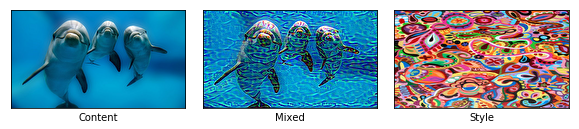

Iteration: 20|loss 57582207107072.0|2670316032.0|5756885504.0|15378456.0


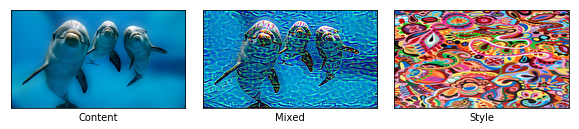

In [ ]:
im = st.run()
image_big(im)